In [1]:
import torch
import matplotlib.pyplot as plt
from models import g_step, MnistDGCCA
from dataset import get_mnist_dataset 
import numpy as np

train_set, train_classes = get_mnist_dataset(train=False, normalize=False)
train_views = list(train_set)

/scratch/sagar/Projects/learn/compressai/venv/lib/python3.6/site-packages/torch/nn/functional.py:3888: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/scratch/sagar/Projects/learn/compressai/venv/lib/python3.6/site-packages/torch/nn/functional.py:3826: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


## Federated DGCCA

/scratch/sagar/Projects/learn/compressai/venv/lib/python3.6/site-packages/torch/nn/functional.py:3888: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/scratch/sagar/Projects/learn/compressai/venv/lib/python3.6/site-packages/torch/nn/functional.py:3826: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


Text(0.5, 1.0, 't-SNE plot of latent representation G')

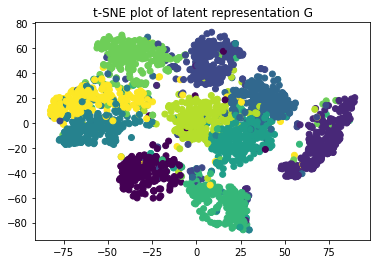

In [3]:
train_set, train_classes = get_mnist_dataset(train=False, normalize=False)

dgcca = torch.load('trained_models/dgcca_mnist_ae2_fed.model')

out = torch.stack(dgcca(train_views))
G = g_step(out.clone().detach())  

import numpy as np
from sklearn.manifold import TSNE

X = G[:10000].numpy()
X_embedded = TSNE(n_components=2).fit_transform(X)

fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:3000,0], X_embedded[:3000,1], c=train_classes[:3000].numpy())
axes.set_title('t-SNE plot of latent representation G')

Text(0.5, 1.0, 't-SNE plot of latent representation G')

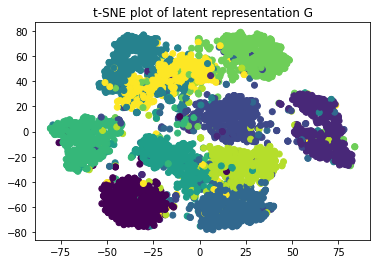

In [9]:

fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:6000,0], X_embedded[:6000,1], c=train_classes[:6000].numpy())
axes.set_title('t-SNE plot of latent representation G')

Text(0.5, 1.0, 't-SNE plot of latent representation G')

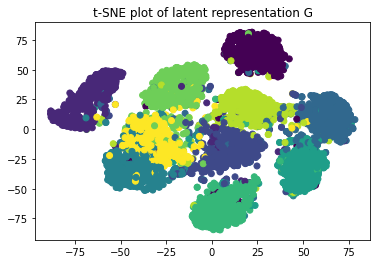

In [6]:
fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:6000,0], X_embedded[:6000,1], c=train_classes[:6000].numpy())
axes.set_title('t-SNE plot of latent representation G')

## Plot Linear GCCA result for MNIST

Text(0.5, 1.0, 't-SNE plot of latent representation G')

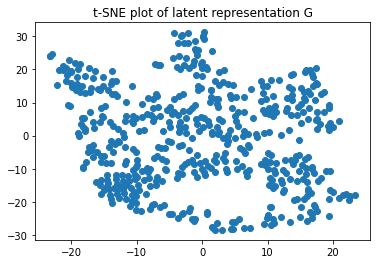

In [55]:
import scipy.io as sio
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# data = sio.loadmat('/scratch/sagar/Projects/federated_max_var_gcca/PAMI_sim/synthetic_large/data/results/mnist_gcca.mat')
data = sio.loadmat('/scratch/sagar/Projects/federated_max_var_gcca/PAMI_sim/synthetic_large/data/results/ehr_G1.mat')


G = data['G_3']

X = G
X_embedded = TSNE(n_components=2).fit_transform(X)

fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:,0], X_embedded[:,1])
axes.set_title('t-SNE plot of latent representation G')


## PCA for mnist

In [19]:
import numpy as np
from sklearn.decomposition import PCA

X = train_set[0].view(60000,-1)
pca = PCA(n_components=10)
X_embed = pca.fit_transform(X)

Text(0.5, 1.0, 't-SNE plot of latent representation G')

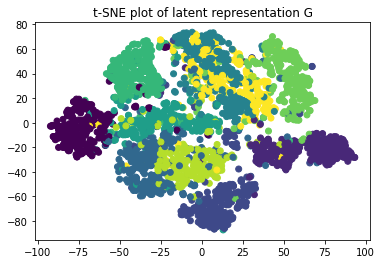

In [22]:
X_embedded = TSNE(n_components=2).fit_transform(X_embed[:10000,:])

fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:3000,0], X_embedded[:3000,1], c=train_classes[:3000].numpy())
axes.set_title('t-SNE plot of latent representation G')


In [14]:
X = train_set[0].view(60000,-1)

## CuteMaxVar Result for MNIST

/scratch/sagar/Projects/learn/compressai/venv/lib/python3.6/site-packages/torch/nn/functional.py:3888: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "
/scratch/sagar/Projects/learn/compressai/venv/lib/python3.6/site-packages/torch/nn/functional.py:3826: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


Text(0.5, 1.0, 't-SNE plot of latent representation G')

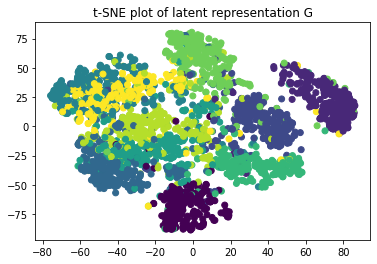

In [53]:
import torch
import matplotlib.pyplot as plt
from models import g_step, MnistDGCCA
from dgcca.mnist.dataset_mnist import get_mnist_dataset 
import numpy as np

test_set, test_classes = get_mnist_dataset(train=False, normalize=False)
test_views = list(test_set)

model_path = 'trained_models/dgcca_mnist_cutemaxvar2.model'

dgcca = torch.load(model_path)
dgcca.train()
out = torch.stack(dgcca(test_views))
out = out - out.mean(dim=1).unsqueeze(dim=1)
G = g_step(out.clone().detach())  

import numpy as np
from sklearn.manifold import TSNE

X = G[:10000].numpy()
X_embedded = TSNE(n_components=2).fit_transform(X)

fig, axes = plt.subplots(1,1)

axes.scatter(X_embedded[:3000,0], X_embedded[:3000,1], c=test_classes[:3000].numpy())
axes.set_title('t-SNE plot of latent representation G')

## Clustering Accuracy

In [36]:
test_classes.shape

torch.Size([10000])

## Classification Accuracy

In [54]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

x_train = G[:8000,:].numpy()
x_test = G[8000:,:].numpy()
y_train = test_classes[:8000].numpy()
y_test = test_classes[8000:].numpy()

clf = svm.SVC(kernel='rbf')

# linear kernel computation
clf.fit(x_train, y_train)


SVC()

In [55]:
from sklearn.metrics import accuracy_score

predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

In [56]:
accuracy

0.9205

In [11]:
gram_train

array([[ 24.61342751,  -5.62166523,  -5.40701721,  -1.9979709 ,
         -6.19890423, -11.91496778,  -2.03745078],
       [ -5.62166523,  28.10349113,   1.23056523,  -0.26402765,
         14.7868293 ,   1.30566054,  -2.29299313],
       [ -5.40701721,   1.23056523,  28.33143833,  -3.1271709 ,
          9.94952802,   8.31576845,  -5.88871115],
       [ -1.9979709 ,  -0.26402765,  -3.1271709 ,  17.474745  ,
         -6.28095426,  -1.07788499,   1.38778726],
       [ -6.19890423,  14.7868293 ,   9.94952802,  -6.28095426,
         23.14771592,   6.67903733,  -4.93010796],
       [-11.91496778,   1.30566054,   8.31576845,  -1.07788499,
          6.67903733,  28.13757906,  -6.94126626],
       [ -2.03745078,  -2.29299313,  -5.88871115,   1.38778726,
         -4.93010796,  -6.94126626,  17.05182486]])

In [12]:
y_train

array([1, 1, 0, 0, 1, 0, 0])